In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope

In [2]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
import pingouin as pg
from scipy.stats import pearsonr
import plotly.express as px

C:\Users\MiguelW12\PycharmProjects\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import chart_studio as cs
import numpy as np
import pandas as pd
import scipy
import chart_studio.plotly as py
from plotly.offline import iplot
import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import chart_studio.plotly as py
from sklearn import preprocessing
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
import pingouin as pg
from scipy.stats import pearsonr


In [ ]:
# upload data

In [7]:
all_files = glob.glob('gsd1a_pheno_final/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename)

    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data

,Row,Column,Plane,Timepoint,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Relative Spot Intensity - Mean per Well,modified_spots_chanel_4 - Number of Spots - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Relative Spot Intensity - Mean per Well,...,Temperature,Target Temperature,CO2,Target CO2,Compound,Concentration,Cell Type,Cell Count,CELL ID,PC
0,2,2,1,0,13.187939,0.564424,0.922726,0.069786,14.439640,0.727480,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
1,2,3,1,0,12.819247,0.634902,0.928933,0.074338,12.799149,0.718221,...,0,37,0,5,NONE,0,GSD3,1500,390,NaN
2,2,4,1,0,13.514527,0.610572,0.909717,0.070032,13.028411,0.711106,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
3,2,5,1,0,13.294831,0.606375,0.912344,0.070279,13.422082,0.694330,...,0,37,0,5,NONE,0,GSD3,1500,390,NaN
4,2,6,1,0,13.336142,0.612997,0.916404,0.071811,13.443971,0.697748,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,7,7,1,0,10.266979,0.538007,0.939536,0.080323,10.857143,0.546669,...,0,37,0,5,NONE,0,HC,1500,9503,72.0
410,7,8,1,0,10.841733,0.550152,0.943045,0.079517,11.533333,0.529070,...,0,37,0,5,COMPA,50,HC,1500,9503,72.0
411,7,9,1,0,10.660549,0.575786,0.939142,0.080830,10.444444,0.562140,...,0,37,0,5,NONE,0,HC,1500,9503,72.0
412,7,10,1,0,10.121657,0.553762,0.942249,0.082364,6.833333,0.431198,...,0,37,0,5,COMPA,50,HC,1500,9503,72.0


In [8]:
path = ('RESULTS_gsd1a_clean') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

In [9]:
CLEAN_SCAT_HEAT_DATA = data.copy()
CLEAN_SCAT_HEAT_DATA

,Row,Column,Plane,Timepoint,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Relative Spot Intensity - Mean per Well,modified_spots_chanel_4 - Number of Spots - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Relative Spot Intensity - Mean per Well,...,Temperature,Target Temperature,CO2,Target CO2,Compound,Concentration,Cell Type,Cell Count,CELL ID,PC
0,2,2,1,0,13.187939,0.564424,0.922726,0.069786,14.439640,0.727480,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
1,2,3,1,0,12.819247,0.634902,0.928933,0.074338,12.799149,0.718221,...,0,37,0,5,NONE,0,GSD3,1500,390,NaN
2,2,4,1,0,13.514527,0.610572,0.909717,0.070032,13.028411,0.711106,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
3,2,5,1,0,13.294831,0.606375,0.912344,0.070279,13.422082,0.694330,...,0,37,0,5,NONE,0,GSD3,1500,390,NaN
4,2,6,1,0,13.336142,0.612997,0.916404,0.071811,13.443971,0.697748,...,0,37,0,5,COMPA,50,GSD3,1500,390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,7,7,1,0,10.266979,0.538007,0.939536,0.080323,10.857143,0.546669,...,0,37,0,5,NONE,0,HC,1500,9503,72.0
410,7,8,1,0,10.841733,0.550152,0.943045,0.079517,11.533333,0.529070,...,0,37,0,5,COMPA,50,HC,1500,9503,72.0
411,7,9,1,0,10.660549,0.575786,0.939142,0.080830,10.444444,0.562140,...,0,37,0,5,NONE,0,HC,1500,9503,72.0
412,7,10,1,0,10.121657,0.553762,0.942249,0.082364,6.833333,0.431198,...,0,37,0,5,COMPA,50,HC,1500,9503,72.0


In [10]:
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.drop(columns=['Plane', 'Timepoint', 'Number of Analyzed Fields', 'Time [s]', 'Temperature', 'Target Temperature', 'CO2', 'Target CO2',  'Row', 'Column',
                                                         ])

CLEAN_SCAT_HEAT_DATA

,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Number of Spots per Area of modified_spots_chanel_3 - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Roundness - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Width [Âµm] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Length [Âµm] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Roundness - Mean per Well,...,ir_chanel_3_total - ir_chanel_3_total Area [ÂµmÂ²] - Sum per Well,total_ir_chanel_4_normalized,total_ir_chanel_3_normalized,Height [Âµm],Compound,Concentration,Cell Type,Cell Count,CELL ID,PC
0,13.187939,0.069786,14.439640,0.064096,13.406192,0.777104,1.852300,4.992640,4.670846,0.714880,...,77781.919680,1084.627695,462.987617,0,COMPA,50,GSD3,1500,390,NaN
1,12.819247,0.074338,12.799149,0.072168,15.079404,0.778360,1.869663,5.015092,4.367118,0.716479,...,302713.616800,1157.965313,466.430842,0,NONE,0,GSD3,1500,390,NaN
2,13.514527,0.070032,13.028411,0.069744,13.904568,0.778655,1.841654,4.839126,4.283400,0.713360,...,74463.597340,1112.421741,365.017634,0,COMPA,50,GSD3,1500,390,NaN
3,13.294831,0.070279,13.422082,0.068505,13.908142,0.771578,1.800768,4.671938,4.214202,0.705102,...,57273.923060,974.960619,254.550769,0,NONE,0,GSD3,1500,390,NaN
4,13.336142,0.071811,13.443971,0.068372,12.267644,0.785977,1.795655,4.412403,4.248049,0.722170,...,39548.335400,1034.980803,288.673981,0,COMPA,50,GSD3,1500,390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,10.266979,0.080323,10.857143,0.075813,10.972724,0.762342,1.710763,3.974651,6.412217,0.839745,...,329.735933,1177.874955,8.677261,0,NONE,0,HC,1500,9503,72.0
410,10.841733,0.079517,11.533333,0.073102,9.685464,0.768307,1.726189,3.884810,3.576044,0.874600,...,540.845849,1099.790357,7.726369,0,COMPA,50,HC,1500,9503,72.0
411,10.660549,0.080830,10.444444,0.053231,155.708447,0.762286,2.677207,8.469141,4.035661,0.781718,...,382.266788,889.708823,8.494818,0,NONE,0,HC,1500,9503,72.0
412,10.121657,0.082364,6.833333,0.065488,79.044219,0.778867,2.151346,5.874830,4.562539,0.950565,...,203.957828,904.752870,5.665495,0,COMPA,50,HC,1500,9503,72.0


In [11]:
CLEAN_SCAT_HEAT_DATA["group"] = CLEAN_SCAT_HEAT_DATA["Cell Type"].astype(str) + CLEAN_SCAT_HEAT_DATA["Compound"].astype(str)
CLEAN_SCAT_HEAT_DATA.set_index(["group"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA["group_with_id"] = CLEAN_SCAT_HEAT_DATA["CELL ID"].astype(str) + CLEAN_SCAT_HEAT_DATA["Cell Type"].astype(str) + CLEAN_SCAT_HEAT_DATA["Compound"].astype(str)
CLEAN_SCAT_HEAT_DATA.set_index(["group_with_id"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA["group_with_pc"] = CLEAN_SCAT_HEAT_DATA["Cell Type"].astype(str) + CLEAN_SCAT_HEAT_DATA["Compound"].astype(str) + CLEAN_SCAT_HEAT_DATA["PC"].astype(str)
CLEAN_SCAT_HEAT_DATA.set_index(["group_with_pc"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA["group_id_pc"] = CLEAN_SCAT_HEAT_DATA["group_with_id"].astype(str) + CLEAN_SCAT_HEAT_DATA["PC"].astype(str)
CLEAN_SCAT_HEAT_DATA.set_index(["group_id_pc"], inplace = True,
                            append = True, drop = False)

CLEAN_SCAT_HEAT_DATA

,,,,,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Number of Spots per Area of modified_spots_chanel_3 - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Roundness - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Width [Âµm] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Length [Âµm] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Roundness - Mean per Well,...,Compound,Concentration,Cell Type,Cell Count,CELL ID,PC,group,group_with_id,group_with_pc,group_id_pc
,group,group_with_id,group_with_pc,group_id_pc,,,,,,,,,,,,,,,,,,,,,
0,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan,13.187939,0.069786,14.439640,0.064096,13.406192,0.777104,1.852300,4.992640,4.670846,0.714880,...,COMPA,50,GSD3,1500,390,NaN,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan
1,GSD3NONE,390GSD3NONE,GSD3NONEnan,390GSD3NONEnan,12.819247,0.074338,12.799149,0.072168,15.079404,0.778360,1.869663,5.015092,4.367118,0.716479,...,NONE,0,GSD3,1500,390,NaN,GSD3NONE,390GSD3NONE,GSD3NONEnan,390GSD3NONEnan
2,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan,13.514527,0.070032,13.028411,0.069744,13.904568,0.778655,1.841654,4.839126,4.283400,0.713360,...,COMPA,50,GSD3,1500,390,NaN,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan
3,GSD3NONE,390GSD3NONE,GSD3NONEnan,390GSD3NONEnan,13.294831,0.070279,13.422082,0.068505,13.908142,0.771578,1.800768,4.671938,4.214202,0.705102,...,NONE,0,GSD3,1500,390,NaN,GSD3NONE,390GSD3NONE,GSD3NONEnan,390GSD3NONEnan
4,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan,13.336142,0.071811,13.443971,0.068372,12.267644,0.785977,1.795655,4.412403,4.248049,0.722170,...,COMPA,50,GSD3,1500,390,NaN,GSD3COMPA,390GSD3COMPA,GSD3COMPAnan,390GSD3COMPAnan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,HCNONE,9503HCNONE,HCNONE72.0,9503HCNONE72.0,10.266979,0.080323,10.857143,0.075813,10.972724,0.762342,1.710763,3.974651,6.412217,0.839745,...,NONE,0,HC,1500,9503,72.0,HCNONE,9503HCNONE,HCNONE72.0,9503HCNONE72.0
410,HCCOMPA,9503HCCOMPA,HCCOMPA72.0,9503HCCOMPA72.0,10.841733,0.079517,11.533333,0.073102,9.685464,0.768307,1.726189,3.884810,3.576044,0.874600,...,COMPA,50,HC,1500,9503,72.0,HCCOMPA,9503HCCOMPA,HCCOMPA72.0,9503HCCOMPA72.0
411,HCNONE,9503HCNONE,HCNONE72.0,9503HCNONE72.0,10.660549,0.080830,10.444444,0.053231,155.708447,0.762286,2.677207,8.469141,4.035661,0.781718,...,NONE,0,HC,1500,9503,72.0,HCNONE,9503HCNONE,HCNONE72.0,9503HCNONE72.0


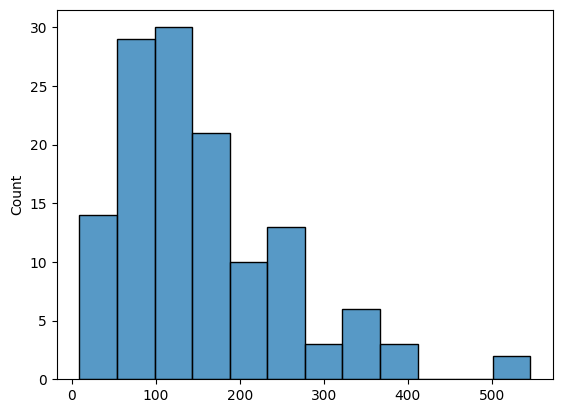

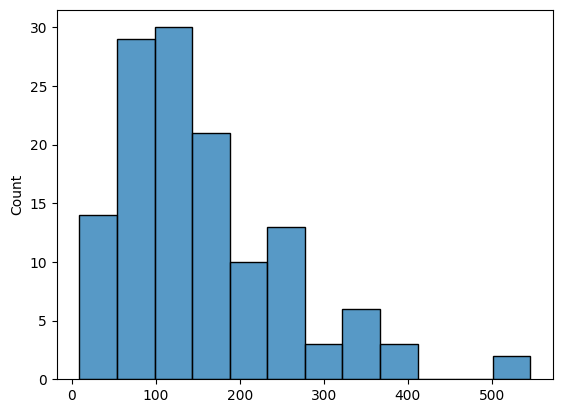

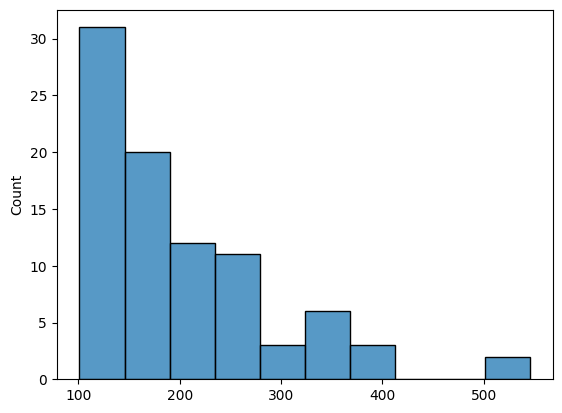

In [12]:
# clear low and high cell count
cell_count =  CLEAN_SCAT_HEAT_DATA["All Cells - Number of Objects"].values
sns.histplot(cell_count)
plt.show()
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.loc[cell_count<1200]
sns.histplot(CLEAN_SCAT_HEAT_DATA["All Cells - Number of Objects"].values)
plt.show()
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.loc[cell_count>100]
sns.histplot(CLEAN_SCAT_HEAT_DATA["All Cells - Number of Objects"].values)
plt.show()
# CLEAN_SCAT_HEAT_DATA

In [17]:
file_1 =   'df_ORIGINAL_det_GSD1A.csv'
CLEAN_SCAT_HEAT_DATA.to_csv(file_1)

In [13]:
CLEAN_SCAT_HEAT_DATA["group_with_pc"].value_counts()

GSD3COMPA72    13
GSD3COMPA48    12
GSD3NONE24     11
GSD3NONE48     11
HCNONE48       11
GSD3NONE72     10
HCNONE24        9
HCNONE72        7
GSD3COMPA24     4
Name: group_with_pc, dtype: int64

In [14]:
# OUTLIER DETECTION MODE 
DataFrame_OutliersDetections = CLEAN_SCAT_HEAT_DATA.copy()
types = CLEAN_SCAT_HEAT_DATA["group_with_pc"].unique()
mask = []
features = CLEAN_SCAT_HEAT_DATA.columns[:158]
#['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
# features = ['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-SAPX', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
print(types)
# detector_list = ['pca_approx', 'robust_cov']


detector_list = [
    
        (
        "Local Outlier Factor 10",
        LocalOutlierFactor(n_neighbors=10),
    ),
    (
        "Local Outlier Factor 8",
        LocalOutlierFactor(n_neighbors=8),
    ),
        (
         "Local Outlier Factor 30",
        LocalOutlierFactor(n_neighbors=30),
        ),
    ]

['GSD3COMPA24' 'GSD3NONE24' 'HCNONE24' 'GSD3COMPA48' 'GSD3NONE48'
 'HCNONE48' 'GSD3COMPA72' 'GSD3NONE72' 'HCNONE72']


In [15]:
for name, algorithm in detector_list:
    errors = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)
    outliers = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)

    for type in types:
        x = DataFrame_OutliersDetections.loc[:,features].values
        F = x.sum(1)
        mask = np.zeros(x.shape[0])
        mask[np.isfinite(F)] = 1
        mask_type = mask * np.array(DataFrame_OutliersDetections["group_with_pc"] == type)
        Curr_df = DataFrame_OutliersDetections.loc[mask_type==1,features]

        x = Curr_df.values
        if name == 'pca_approx':

            x = StandardScaler().fit_transform(x)
            # F = x.sum(1)
            # x = x[np.isfinite(F),:]
            # mask[1-np.isfinite(F)] = False
            # pd.DataFrame(data = Curr_df, columns = features).head()
            # pca = PCA(n_components=2)
            lower_dimensional_data = algorithm.fit_transform(x)
            pproximation = algorithm.inverse_transform(lower_dimensional_data)

            err = np.linalg.norm(x-pproximation,2,axis=1)

            errors[mask_type==1] = err
            outliers[mask_type==1] = (err < 5) * 2 - 1
            if False:
                plt.scatter(lower_dimensional_data[:,0],lower_dimensional_data[:,1],c=err>5)
                plt.title(type)
                plt.show()
        else:
            algorithm.fit(x)
            if name == "Robust covariance":
                errors[mask_type==1] = algorithm.mahalanobis(x)
                outliers[mask_type==1] = algorithm.predict(x)

            if  "Local Outlier Factor" in name:
                errors[mask_type==1] = algorithm.negative_outlier_factor_
                outliers[mask_type==1] = algorithm.fit_predict(x)
            else:
                y_pred = algorithm.fit(x).predict(x)



        # Curr_df[name] = errors[mask_type==1]
        # Curr_df[f'{name}_outliers'] = outliers[mask_type==1]
        # Curr_df.set_index(name, inplace = True,
        #                         append = True, drop = False)
        # file =   f'{type}_df_outliers_det.csv'
        # Curr_df.to_csv(file)
    DataFrame_OutliersDetections[name] = errors
    DataFrame_OutliersDetections[f'{name}_outliers'] = outliers
    DataFrame_OutliersDetections.set_index(name, inplace = True,
                            append = True, drop = False)

    file2 =   '2df_outliers_det_GSD1A.csv'
    DataFrame_OutliersDetections.to_csv(file2)


C:\Users\MiguelW12\PycharmProjects\sklearn\neighbors\_lof.py:284: UserWarning:

n_neighbors (10) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.

C:\Users\MiguelW12\PycharmProjects\sklearn\neighbors\_lof.py:284: UserWarning:

n_neighbors (10) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.

C:\Users\MiguelW12\PycharmProjects\sklearn\neighbors\_lof.py:284: UserWarning:

n_neighbors (10) is greater than the total number of samples (9). n_neighbors will be set to (n_samples - 1) for estimation.

C:\Users\MiguelW12\PycharmProjects\sklearn\neighbors\_lof.py:284: UserWarning:

n_neighbors (10) is greater than the total number of samples (9). n_neighbors will be set to (n_samples - 1) for estimation.

C:\Users\MiguelW12\PycharmProjects\sklearn\neighbors\_lof.py:284: UserWarning:

n_neighbors (10) is greater than the total number of samples (7). n_neighbors will be set to (n_

In [17]:
DataFrame_OutliersDetections

,,,,,,,,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Number of Spots per Area of modified_spots_chanel_3 - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Roundness - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Width [Âµm] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Length [Âµm] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Roundness - Mean per Well,...,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers
,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 8,Local Outlier Factor 30,,,,,,,,,,,,,,,,,,,,,
0,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-0.947035,-0.947035,-0.947035,13.359696,0.070608,13.517384,0.067300,9.723734,0.773583,1.732064,4.427862,4.224128,0.695354,...,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-0.947035,1.0,-0.947035,1.0,-0.947035,1.0
1,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.008693,-1.004582,-1.008693,13.610091,0.069343,13.396567,0.067632,9.725121,0.777170,1.699413,4.265651,4.085160,0.694298,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.008693,1.0,-1.004582,1.0,-1.008693,1.0
2,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-1.013579,-1.013579,-1.013579,13.930435,0.068012,13.113793,0.069693,9.795572,0.772681,1.699755,4.351317,3.973862,0.684890,...,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-1.013579,1.0,-1.013579,1.0,-1.013579,1.0
3,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.019422,-1.007809,-1.019422,13.042561,0.072243,12.611399,0.075877,10.294005,0.772190,1.726144,4.273242,4.085376,0.646187,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.019422,1.0,-1.007809,1.0,-1.019422,1.0
5,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.023806,-0.984168,-1.023806,12.711365,0.071715,12.490085,0.076719,9.951446,0.773357,1.694496,4.123924,3.857448,0.727448,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.023806,1.0,-0.984168,1.0,-1.023806,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.994958,-0.975469,-0.981864,11.402439,0.079109,11.439560,0.084480,10.436542,0.763958,1.720646,4.190004,4.439227,0.756208,...,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.994958,1.0,-0.975469,1.0,-0.981864,1.0
161,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,-1.035766,-1.036765,-1.035766,11.293755,0.079450,12.023952,0.083996,10.712398,0.765196,1.722929,4.169465,3.918577,0.889281,...,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,-1.035766,1.0,-1.036765,1.0,-1.035766,1.0
162,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.979515,-0.980696,-0.990041,11.323329,0.079263,12.982301,0.080088,9.767242,0.768888,1.726668,4.061326,4.048031,0.818714,...,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.979515,1.0,-0.980696,1.0,-0.990041,1.0


In [19]:
DataFrame_OutliersDetections["group_with_pc"].value_counts()

HCNONE72       105
HCNONE24       102
GSD1ANONE24     97
HCNONE48        85
GSD1ANONE72     81
GSD1ANONE48     79
Name: group_with_pc, dtype: int64

In [16]:
df_clean = DataFrame_OutliersDetections[DataFrame_OutliersDetections['Local Outlier Factor 10_outliers'] == 1]
df_clean

,,,,,,,,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,modified_spots_chanel_3 - Number of Spots per Area of modified_spots_chanel_3 - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Roundness - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Width [Âµm] - Mean per Well,modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Length [Âµm] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Area [ÂµmÂ²] - Mean per Well,modified_ir_chanel_3_at - modified_ir_chanel_3_at Roundness - Mean per Well,...,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers
,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 8,Local Outlier Factor 30,,,,,,,,,,,,,,,,,,,,,
0,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-0.947035,-0.947035,-0.947035,13.359696,0.070608,13.517384,0.067300,9.723734,0.773583,1.732064,4.427862,4.224128,0.695354,...,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-0.947035,1.0,-0.947035,1.0,-0.947035,1.0
1,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.008693,-1.004582,-1.008693,13.610091,0.069343,13.396567,0.067632,9.725121,0.777170,1.699413,4.265651,4.085160,0.694298,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.008693,1.0,-1.004582,1.0,-1.008693,1.0
2,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-1.013579,-1.013579,-1.013579,13.930435,0.068012,13.113793,0.069693,9.795572,0.772681,1.699755,4.351317,3.973862,0.684890,...,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-1.013579,1.0,-1.013579,1.0,-1.013579,1.0
3,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.019422,-1.007809,-1.019422,13.042561,0.072243,12.611399,0.075877,10.294005,0.772190,1.726144,4.273242,4.085376,0.646187,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.019422,1.0,-1.007809,1.0,-1.019422,1.0
5,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.023806,-0.984168,-1.023806,12.711365,0.071715,12.490085,0.076719,9.951446,0.773357,1.694496,4.123924,3.857448,0.727448,...,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.023806,1.0,-0.984168,1.0,-1.023806,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.994958,-0.975469,-0.981864,11.402439,0.079109,11.439560,0.084480,10.436542,0.763958,1.720646,4.190004,4.439227,0.756208,...,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.994958,1.0,-0.975469,1.0,-0.981864,1.0
161,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,-1.035766,-1.036765,-1.035766,11.293755,0.079450,12.023952,0.083996,10.712398,0.765196,1.722929,4.169465,3.918577,0.889281,...,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,-1.035766,1.0,-1.036765,1.0,-1.035766,1.0
162,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.979515,-0.980696,-0.990041,11.323329,0.079263,12.982301,0.080088,9.767242,0.768888,1.726668,4.061326,4.048031,0.818714,...,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.979515,1.0,-0.980696,1.0,-0.990041,1.0


In [27]:
df_clean["group_with_pc"].value_counts()

HCNONE72       93
HCNONE24       91
GSD1ANONE24    86
HCNONE48       77
GSD1ANONE48    72
GSD1ANONE72    65
Name: group_with_pc, dtype: int64

Total number of cells 484


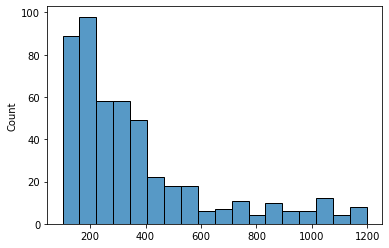

In [33]:
cell_count =  df_clean["All Cells - Number of Objects"].values
sns.histplot(cell_count)
print(f'Total number of cells {len(cell_count)}')

In [28]:
file_3 =   '3df_outliers_det_clean_GSD1A.csv'
df_clean.to_csv(file_3)

In [33]:
# CREATE PLATE CONDITION DATA FRAMES
df_24 = df_clean[df_clean['PC'] == 24]
df_48 = df_clean[df_clean['PC'] == 48]
df_72 = df_clean[df_clean['PC'] == 72]



In [34]:
#define hc +hc mean data frames 
#24
hc_24 = df_24[(df_24['group'] == 'HCNONE')]
hc_24_mean = hc_24.mean()
#48
hc_48 = df_48[(df_48['group'] == 'HCNONE')]
hc_48_mean = hc_48.mean()
#72
hc_72 = df_72[(df_72['group'] == 'HCNONE')]
hc_72_mean = hc_72.mean()


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_4984\3304048908.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_4984\3304048908.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_4984\3304048908.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [35]:
# normalize to HC all conditions 
N_df_24 = df_24/hc_24_mean
N_df_48 = df_48/hc_48_mean
N_df_72 = df_72/hc_72_mean



In [36]:
#initialze the excel writer
writer = pd.ExcelWriter(path + '//' + 'livesummary-excel_full_feat.xlsx', engine='xlsxwriter')

    #store your dataframes in a  dict, where the key is the sheet name you want
frames = {'24': N_df_24, '48': N_df_48,
              '72': N_df_72}
    #frames = {'HCUN': HCUN, 'DSUN': DSUN}
    #now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): # .use .items for python 3.X
    frame.to_excel(writer, sheet_name = sheet)

    #critical last step
writer.save()
    #writer.close()
print('done')


done


In [ ]:
## feature selection

In [29]:
df_clean.fillna(0, inplace=True)

In [ ]:
#lyso

In [30]:
df_lyso_a1 = df_clean[['modified_spots_chanel_4 - Total Spot Area - Mean per Well',

'modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well',
'spots_chanel_4_final - Spot Area [pxֲ²] - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Area [ֲµmֲ²] - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Roundness - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Width [ֲµm] - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Length [ֲµm] - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 30%  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 40%  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 50%  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 60%  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Radial Mean  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Radial Relative Deviation  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Profile 1/2  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Profile 2/2  - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 30% SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 40% SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 50% SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Threshold Compactness 60% SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Radial Mean SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Radial Relative Deviation SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Radial Mean Ratio SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Profile 1/2 SER-Spot - Mean per Well',
'spots_chanel_4_final - spots_chanel_4_final Profile 2/2 SER-Spot - Mean per Well',
]]
df_lyso_a1.fillna(0, inplace=True)
df_lyso_a1.to_csv(path +  '//' + 'lyso_area1_feat.csv' )
df_lyso_a1.shape

(484, 24)

In [31]:
df_lyso_a2 = df_clean[[
'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Area [ֲµmֲ²] - Mean per Well',
'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Roundness - Mean per Well',
'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Width [ֲµm] - Mean per Well',
'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Length [ֲµm] - Mean per Well',
'modified_ir_chanel_4_at - modified_ir_chanel_4_at Area [ֲµmֲ²] - Mean per Well',
'modified_ir_chanel_4_at - modified_ir_chanel_4_at Roundness - Mean per Well',
'modified_ir_chanel_4_at - modified_ir_chanel_4_at Width [ֲµm] - Mean per Well',
'modified_ir_chanel_4_at - modified_ir_chanel_4_at Length [ֲµm] - Mean per Well',
'ir_chanel_4_total - ir_chanel_4_total Area [ֲµmֲ²] - Sum per Well',
'total_ir_chanel_4_normalized']]
df_lyso_a2.fillna(0, inplace=True)
df_lyso_a2.to_csv(path +  '//' + 'lyso_area2_feat.csv' )
df_lyso_a2.shape

(484, 10)

In [32]:
df_lyso_a3 = df_clean[[
'All Cells - chanel_4 Threshold Compactness 30%  - Mean per Well',
'All Cells - chanel_4 Threshold Compactness 40%  - Mean per Well',
'All Cells - chanel_4 Threshold Compactness 50%  - Mean per Well',
'All Cells - chanel_4 Threshold Compactness 60%  - Mean per Well',
'All Cells - chanel_4 Profile 1/5  - Mean per Well',
'All Cells - chanel_4 Profile 2/5  - Mean per Well',
'All Cells - chanel_4 Profile 3/5  - Mean per Well',
'All Cells - chanel_4 Profile 4/5  - Mean per Well',
'All Cells - chanel_4 Profile 5/5  - Mean per Well',
'ir_chanel_4_total - ir_chanel_4_total Area [ֲµmֲ²] - Sum per Well',
'total_ir_chanel_4_normalized']]
df_lyso_a3.fillna(0, inplace=True)
df_lyso_a3.to_csv(path +  '//' + 'lyso_area3_feat.csv' )
df_lyso_a3.shape

(484, 11)

In [33]:
df_lyso_i = df_clean[[
'All Cells - chanel_4_intensity Mean - Mean per Well',
'All Cells - chanel_4_intensity Sum - Sum per Well',
'spots_chanel_4_final - Relative Spot Intensity - Mean per Well',
'spots_chanel_4_final - Corrected Spot Intensity - Mean per Well',
'spots_chanel_4_final - Uncorrected Spot Peak Intensity - Mean per Well',
'spots_chanel_4_final - Spot Contrast - Mean per Well',
'spots_chanel_4_final - Spot Background Intensity - Mean per Well',
'spots_chanel_4_final - Region Intensity - Mean per Well',
'spots_chanel_4_final - Spot to Region Intensity - Mean per Well']]
df_lyso_i.fillna(0, inplace=True)
df_lyso_i.to_csv(path +  '//' + 'lyso_intensity_feat.csv' )
df_lyso_i.shape

(484, 9)

In [34]:
df_lyso_t = df_clean[['All Cells - chanel_4 Gabor Max 2 px w2 - Mean per Well',
'All Cells - chanel_4 SER Spot 1 px - Mean per Well',
'All Cells - chanel_4 SER Hole 1 px - Mean per Well',
'All Cells - chanel_4 SER Ridge 1 px - Mean per Well',
'All Cells - chanel_4 SER Valley 1 px - Mean per Well']]
df_lyso_t.fillna(0, inplace=True)
df_lyso_t.to_csv(path +  '//' + 'lyso_texture_feat.csv' )
df_lyso_t.shape

(484, 5)

In [ ]:
#Tmre

In [35]:
df_tmre_a1 = df_clean[['modified_spots_chanel_3 - Total Spot Area - Mean per Well',

'modified_spots_chanel_3 - Number of Spots per Area of modified_spots_chanel_3 - Mean per Well',
'spots_chanel_3_final - Spot Area [pxֲ²] - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Area [ֲµmֲ²] - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Roundness - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Width [ֲµm] - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Length [ֲµm] - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 30%  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 40%  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 50%  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 60%  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Radial Mean  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Radial Relative Deviation  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Profile 1/2  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Profile 2/2  - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 30% SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 40% SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 50% SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Threshold Compactness 60% SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Radial Mean SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Radial Relative Deviation SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Radial Mean Ratio SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Profile 1/2 SER-Spot - Mean per Well',
'spots_chanel_3_final - spots_chanel_3_final Profile 2/2 SER-Spot - Mean per Well']]
df_tmre_a1.fillna(0, inplace=True)
df_tmre_a1.to_csv(path +  '//' + 'tmre_area1_feat.csv' )
df_tmre_a1.shape

(484, 24)

In [36]:
df_tmre_a2 = df_clean[[
'modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Area [ֲµmֲ²] - Mean per Well',
'modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Roundness - Mean per Well',
'modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Width [ֲµm] - Mean per Well',
'modified_ir_chanel_3_ct - modified_ir_chanel_3_ct Length [ֲµm] - Mean per Well',
'modified_ir_chanel_3_at - modified_ir_chanel_3_at Area [ֲµmֲ²] - Mean per Well',
'modified_ir_chanel_3_at - modified_ir_chanel_3_at Roundness - Mean per Well',
'modified_ir_chanel_3_at - modified_ir_chanel_3_at Width [ֲµm] - Mean per Well',
'modified_ir_chanel_3_at - modified_ir_chanel_3_at Length [ֲµm] - Mean per Well',
'ir_chanel_3_total - ir_chanel_3_total Area [ֲµmֲ²] - Sum per Well',
'total_ir_chanel_3_normalized']]
df_tmre_a2.fillna(0, inplace=True)
df_tmre_a2.to_csv(path +  '//' + 'tmre_area2_feat.csv' )
df_tmre_a2.shape

(484, 10)

In [37]:
df_tmre_a3 = df_clean[[
'All Cells - chanel_3 Threshold Compactness 30%  - Mean per Well',
'All Cells - chanel_3 Threshold Compactness 40%  - Mean per Well',
'All Cells - chanel_3 Threshold Compactness 50%  - Mean per Well',
'All Cells - chanel_3 Threshold Compactness 60%  - Mean per Well',
'All Cells - chanel_3 Profile 1/5  - Mean per Well',
'All Cells - chanel_3 Profile 2/5  - Mean per Well',
'All Cells - chanel_3 Profile 3/5  - Mean per Well',
'All Cells - chanel_3 Profile 4/5  - Mean per Well',
'All Cells - chanel_3 Profile 5/5  - Mean per Well',
'ir_chanel_3_total - ir_chanel_3_total Area [ֲµmֲ²] - Sum per Well',
'total_ir_chanel_3_normalized']]
df_tmre_a3.fillna(0, inplace=True)
df_tmre_a3.to_csv(path +  '//' + 'tmre_area3_feat.csv' )
df_tmre_a3.shape

(484, 11)

In [38]:
df_tmre_i = df_clean[[
'All Cells - chanel_3_intensity Mean - Mean per Well',
'All Cells - chanel_3_intensity Sum - Sum per Well',
'spots_chanel_3_final - Relative Spot Intensity - Mean per Well',
'spots_chanel_3_final - Corrected Spot Intensity - Mean per Well',
'spots_chanel_3_final - Uncorrected Spot Peak Intensity - Mean per Well',
'spots_chanel_3_final - Spot Contrast - Mean per Well',
'spots_chanel_3_final - Spot Background Intensity - Mean per Well',
'spots_chanel_3_final - Region Intensity - Mean per Well',
'spots_chanel_3_final - Spot to Region Intensity - Mean per Well']]
df_tmre_i.fillna(0, inplace=True)
df_tmre_i.to_csv(path +  '//' + 'tmre_intensity_feat.csv' )
df_tmre_i.shape

(484, 9)

In [39]:
df_tmre_t = df_clean[['All Cells - chanel_3 Gabor Max 2 px w2 - Mean per Well',
'All Cells - chanel_3 SER Spot 1 px - Mean per Well',
'All Cells - chanel_3 SER Hole 1 px - Mean per Well',
'All Cells - chanel_3 SER Ridge 1 px - Mean per Well',
'All Cells - chanel_3 SER Valley 1 px - Mean per Well']]
df_tmre_t.fillna(0, inplace=True)
df_tmre_t.to_csv(path +  '//' + 'tmre_texture_feat.csv' )
df_tmre_t.shape

(484, 5)

In [ ]:
#Nuc

In [40]:
df_nuc_a1 = df_clean[['All Cells - chanel_1 Symmetry 02  - Mean per Well',
'All Cells - chanel_1 Symmetry 03  - Mean per Well',
'All Cells - chanel_1 Symmetry 04  - Mean per Well',
'All Cells - chanel_1 Symmetry 05  - Mean per Well',
'All Cells - chanel_1 Symmetry 12  - Mean per Well',
'All Cells - chanel_1 Symmetry 13  - Mean per Well',
'All Cells - chanel_1 Symmetry 14  - Mean per Well',
'All Cells - chanel_1 Symmetry 15  - Mean per Well',
'All Cells - chanel_1 Axial Small Length  - Mean per Well',
'All Cells - chanel_1 Axial Length Ratio  - Mean per Well',
'All Cells - chanel_1 Radial Mean  - Mean per Well',
'All Cells - chanel_1 Radial Relative Deviation  - Mean per Well']]
df_nuc_a1.fillna(0, inplace=True)
df_nuc_a1.to_csv(path +  '//' + 'nuc_area1_feat.csv' )
df_nuc_a1.shape

(484, 12)

In [41]:
df_nuc_a2 = df_clean[[
'All Cells - chanel_1 Area [ֲµmֲ²] - Mean per Well',
'All Cells - chanel_1 Roundness - Mean per Well',
'All Cells - chanel_1 Width [ֲµm] - Mean per Well',
'All Cells - chanel_1 Length [ֲµm] - Mean per Well']]
df_nuc_a2.fillna(0, inplace=True)
df_nuc_a2.to_csv(path +  '//' + 'nuc_area2_feat.csv' )
df_nuc_a2.shape

(484, 4)

In [42]:
df_nuc_t = df_clean[['All Cells - chanel_1 Gabor Max 2 px w2 - Mean per Well', 
'All Cells - chanel_1 SER Spot 1 px - Mean per Well',
'All Cells - chanel_1 SER Hole 1 px - Mean per Well',
'All Cells - chanel_1 SER Ridge 1 px - Mean per Well',
'All Cells - chanel_1 SER Valley 1 px - Mean per Well']]
df_nuc_t.fillna(0, inplace=True)
df_nuc_t.to_csv(path +  '//' + 'nuc_texture_feat.csv' )
df_nuc_t.shape

(484, 5)

In [ ]:
#Calcien

In [43]:
df_calc_a1 = df_clean[[
'All Cells - chanel_2 Symmetry 02  - Mean per Well',
'All Cells - chanel_2 Symmetry 03  - Mean per Well',
'All Cells - chanel_2 Symmetry 04  - Mean per Well',
'All Cells - chanel_2 Symmetry 05  - Mean per Well',
'All Cells - chanel_2 Symmetry 12  - Mean per Well',
'All Cells - chanel_2 Symmetry 13  - Mean per Well',
'All Cells - chanel_2 Symmetry 14  - Mean per Well',
'All Cells - chanel_2 Symmetry 15  - Mean per Well',
'All Cells - chanel_2 Axial Small Length  - Mean per Well',
'All Cells - chanel_2 Axial Length Ratio  - Mean per Well',
'All Cells - chanel_2 Radial Mean  - Mean per Well',
'All Cells - chanel_2 Radial Relative Deviation  - Mean per Well']]
df_calc_a1.fillna(0, inplace=True)
df_calc_a1.to_csv(path +  '//' + 'calc_area1_feat.csv' )
df_calc_a1.shape

(484, 12)

In [44]:
df_calc_a2 = df_clean[['All Cells - chanel_2 Area [ֲµmֲ²] - Mean per Well',
'All Cells - chanel_2 Roundness - Mean per Well',
'All Cells - chanel_2 Width [ֲµm] - Mean per Well',
'All Cells - chanel_2 Length [ֲµm] - Mean per Well']]
df_calc_a2.fillna(0, inplace=True)
df_calc_a2.to_csv(path +  '//' + 'calc_area2_feat.csv' )
df_calc_a2.shape

(484, 4)

In [45]:
df_calc_t = df_clean[['All Cells - chanel_2 Gabor Max 2 px w2 - Mean per Well',
'All Cells - chanel_2 SER Spot 1 px - Mean per Well',
'All Cells - chanel_2 SER Hole 1 px - Mean per Well',
'All Cells - chanel_2 SER Ridge 1 px - Mean per Well',
'All Cells - chanel_2 SER Valley 1 px - Mean per Well']]
df_calc_t.fillna(0, inplace=True)
df_calc_t.to_csv(path +  '//' + 'calc_texture_feat.csv' )
df_calc_t.shape

(484, 5)

In [25]:
#keep features by feature selection
df_clean_final = df_clean[['All Cells - chanel_2 Symmetry 03  - Mean per Well', 'All Cells - chanel_2 Roundness - Mean per Well', 'All Cells - chanel_2 Symmetry 04  - Mean per Well', 
                           'All Cells - chanel_2 SER Spot 1 px - Mean per Well', 'All Cells - chanel_2_intensity Mean - Mean per Well',
                           'All Cells - chanel_1 Symmetry 05  - Mean per Well', 'All Cells - chanel_1 Radial Relative Deviation  - Mean per Well', 
                           'All Cells - chanel_1 SER Spot 1 px - Mean per Well', 'All Cells - chanel_1_intensity Mean - Mean per Well',
                           'spots_chanel_4_final - spots_chanel_4_final Radial Mean Ratio SER-Spot - Mean per Well', 'All Cells - chanel_4 Threshold Compactness 50%  - Mean per Well', 'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Roundness - Mean per Well',
                           'All Cells - chanel_4 SER Spot 1 px - Mean per Well', 'All Cells - chanel_4 SER Hole 1 px - Mean per Well',
                           'All Cells - chanel_4_intensity Mean - Mean per Well',
                           'All Cells - chanel_3 Profile 5/5  - Mean per Well', 'total_ir_chanel_3_normalized', 'spots_chanel_3_final - spots_chanel_3_final Radial Mean SER-Spot - Mean per Well',  
                           'spots_chanel_3_final - Region Intensity - Mean per Well', 
                           'All Cells - chanel_3 SER Hole 1 px - Mean per Well', 'All Cells - chanel_3 SER Valley 1 px - Mean per Well',
                            'group', 'group_with_id', "group_with_pc", "PC"]]
#add group with pc, pc, 
#     'All Cells - Number of Objects', 'PC', 'Plane', 'Timepoint', 'Number of Analyzed Fields', 'Height [µm]',
#                              'Time [s]', 'Temperature', 'Target Temperature', 'CO2', 'Target CO2', 'Cell Count', 'Row', 'Column', 'Concentration'])
# df_clean_final = df_clean_final.rename(
#     columns={'All Cells - TMRE Intensity Mean - Mean per Well': 'TmreIntensityMean',
             

In [ ]:
#rename features

In [26]:
df_clean_final = df_clean_final.rename(
     columns={'All Cells - chanel_2 Symmetry 03  - Mean per Well': 'calc_area1', 'All Cells - chanel_2 Roundness - Mean per Well': 'calc_area2', 'All Cells - chanel_2 Symmetry 04  - Mean per Well': 'calc_area3', 'All Cells - chanel_2 Length [ֲµm] - Mean per Well': 'calc_area4',
              'All Cells - chanel_2 SER Spot 1 px - Mean per Well': 'calc_text1', 'All Cells - chanel_2_intensity Mean - Mean per Well': 'calc_intensity',
              'All Cells - chanel_1 Symmetry 05  - Mean per Well': 'nuc_area1', 'All Cells - chanel_1 Radial Relative Deviation  - Mean per Well': 'nuc_area2', 'All Cells - chanel_1 Area [ֲµmֲ²] - Mean per Well': 'nuc_area3', 'All Cells - chanel_1 Width [ֲµm] - Mean per Well': 'nuc_area4',
              'All Cells - chanel_1 SER Spot 1 px - Mean per Well': 'nuc_text1', 'All Cells - chanel_1_intensity Mean - Mean per Well': 'nuc_intensity',
              'All Cells - chanel_4 Threshold Compactness 50%  - Mean per Well': 'lyso_area1', 'spots_chanel_4_final - spots_chanel_4_final Radial Mean Ratio SER-Spot - Mean per Well': 'lyso_area2', 'modified_ir_chanel_4_ct - modified_ir_chanel_4_ct Roundness - Mean per Well': 'lyso_area3',
              'All Cells - chanel_4 SER Hole 1 px - Mean per Well': 'lyso_text1', 'All Cells - chanel_4 SER Spot 1 px - Mean per Well': 'lyso_text2', 'All Cells - chanel_4_intensity Mean - Mean per Well': 'lyso_intensity1', 
              'total_ir_chanel_3_normalized': 'tmre_area1', 'All Cells - chanel_3 Profile 5/5  - Mean per Well': 'tmre_area2', 'spots_chanel_3_final - spots_chanel_3_final Radial Mean SER-Spot - Mean per Well': 'tmre_area3',
              'All Cells - chanel_3 SER Hole 1 px - Mean per Well': 'tmre_text1', 'All Cells - chanel_3 SER Valley 1 px - Mean per Well': 'tmre_text2', 'spots_chanel_3_final - Region Intensity - Mean per Well': 'tmre_intensity1' 
             })

In [27]:
df_clean_final

,,,,,,,,calc_area1,calc_area2,calc_area3,calc_text1,calc_intensity,nuc_area1,nuc_area2,nuc_text1,nuc_intensity,lyso_area2,...,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,group,group_with_id,group_with_pc,PC
,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 8,Local Outlier Factor 30,,,,,,,,,,,,,,,,,,,,,
0,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-0.947035,-0.947035,-0.947035,0.103943,0.400598,0.368225,0.008994,839.796249,0.033683,0.391527,0.039951,257.282480,0.832561,...,0.290462,328.406220,1.491999,178.502760,0.104288,0.608898,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,24
1,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.008693,-1.004582,-1.008693,0.099854,0.392595,0.378012,0.008859,981.581092,0.031897,0.387955,0.039669,244.505439,0.829919,...,0.369916,286.581568,1.552679,162.645728,0.099837,0.539453,GSD3NONE,390GSD3NONE,GSD3NONE24,24
2,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,-1.013579,-1.013579,-1.013579,0.109486,0.387905,0.364293,0.009433,875.671353,0.028363,0.388889,0.039960,212.722830,0.828961,...,0.312186,273.785673,1.537399,158.376979,0.100311,0.521502,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,24
3,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.019422,-1.007809,-1.019422,0.115078,0.373874,0.374220,0.009240,935.720242,0.036892,0.398436,0.040046,191.906702,0.828792,...,0.334926,100.507392,1.476757,133.316435,0.074038,0.371182,GSD3NONE,390GSD3NONE,GSD3NONE24,24
5,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,-1.023806,-0.984168,-1.023806,0.119852,0.349696,0.378295,0.009561,645.286069,0.036350,0.388971,0.039100,165.352295,0.815191,...,0.269416,99.719379,1.478597,134.630324,0.076078,0.362007,GSD3NONE,390GSD3NONE,GSD3NONE24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.994958,-0.975469,-0.981864,0.171823,0.240148,0.304544,0.010605,502.281736,0.050567,0.393641,0.042040,186.655845,0.811486,...,0.614562,83.819428,1.247024,138.264447,0.059658,0.295044,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,72
161,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,-1.035766,-1.036765,-1.035766,0.167685,0.223935,0.284899,0.009094,786.441158,0.051018,0.377738,0.041708,121.110262,0.810626,...,0.738384,62.095746,1.220898,151.964881,0.058369,0.289008,GSD3NONE,576GSD3NONE,GSD3NONE72,72
162,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,-0.979515,-0.980696,-0.990041,0.171755,0.226047,0.273678,0.010150,559.379322,0.051304,0.369228,0.041633,110.595690,0.809577,...,0.716826,51.120230,1.218645,167.243627,0.056094,0.280706,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,72


In [77]:
file_cor = 'df_clean_feat_GSD1A.csv'
df_clean_final.to_csv(file_cor)

In [29]:
# CREATE PLATE CONDITION DATA FRAMES
df_24 = df_clean_final[df_clean_final['PC'] == 24]
df_48 = df_clean_final[df_clean_final['PC'] == 48]
df_72 = df_clean_final[df_clean_final['PC'] == 72]
                        


In [30]:
#define hc +hc mean data frames 
#24
hc_24 = df_24[(df_24['group'] == 'HCNONE')]
hc_24_mean = hc_24.mean()
#48
hc_48 = df_48[(df_48['group'] == 'HCNONE')]
hc_48_mean = hc_48.mean()
#72
hc_72 = df_72[(df_72['group'] == 'HCNONE')]
hc_72_mean = hc_72.mean()



C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17164\3183067132.py:4: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17164\3183067132.py:10: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17164\3183067132.py:13: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the

In [31]:
# normalize to HC all conditions 
N_df_24 = df_24/hc_24_mean
N_df_48 = df_48/hc_48_mean
N_df_72 = df_72/hc_72_mean

In [32]:
#initialze the excel writer
writer = pd.ExcelWriter(path + '//' + 'n-livesummary-excel.xlsx', engine='xlsxwriter')

    #store your dataframes in a  dict, where the key is the sheet name you want
frames = {'24': N_df_24, '48': N_df_48,
              '72': N_df_72}
    
    #now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): 
    frame.to_excel(writer, sheet_name = sheet)

    #critical last step
writer.save()
    #writer.close()
print('done')


done


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17164\3657344344.py:13: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version



In [33]:
#combine df's outside and read again 
all_files = glob.glob('gsd1a_stats/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_intensity,calc_text1,lyso_area1,...,nuc_area1,nuc_area2,nuc_intensity,nuc_text1,tmre_area1,tmre_area2,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2
0,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,0.780253,1.052927,1.124726,1.029012,0.892115,0.978287,...,0.829002,1.009944,1.459832,1.006169,1.567704,0.774553,1.019777,1.199809,1.275028,1.516355
1,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.749557,1.031893,1.154619,1.202743,0.878715,0.987101,...,0.785043,1.000731,1.387334,0.999068,1.368046,0.986425,1.061252,1.093225,1.220615,1.343415
2,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,0.821866,1.019563,1.112715,1.072971,0.935674,0.913023,...,0.698067,1.003140,1.206998,1.006392,1.306963,0.832483,1.050808,1.064533,1.226413,1.298710
3,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.863840,0.982686,1.143037,1.146549,0.916483,1.022551,...,0.907980,1.027768,1.088887,1.008554,0.479789,0.893120,1.009359,0.896088,0.905188,0.924365
4,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.899680,0.919136,1.155483,0.790677,0.948322,0.992011,...,0.894640,1.003354,0.938216,0.984728,0.476028,0.718430,1.010617,0.904919,0.930131,0.901515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,1.333333,0.675500,0.881413,0.662267,1.188606,1.007626,...,1.245545,1.035185,1.366223,1.067010,0.816667,1.371567,0.894445,1.112837,0.884798,0.965362
84,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,1.301224,0.629896,0.824558,1.036936,1.019237,0.984092,...,1.256663,0.993362,0.886463,1.058574,0.605009,1.647911,0.875706,1.223107,0.865678,0.945613
85,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,1.332808,0.635837,0.792081,0.737551,1.137631,1.000701,...,1.263711,0.970983,0.809502,1.056670,0.498073,1.599798,0.874090,1.346079,0.831945,0.918448
86,HCNONE,9503HCNONE,HCNONE72,9503HCNONE72,1.111124,0.904778,0.896497,0.972283,1.010171,1.087262,...,0.895159,1.030101,1.481397,0.995080,2.916240,1.110917,0.976264,1.132137,1.366173,1.446992


In [36]:
df["group_with_pc"].value_counts()

GSD3COMPA72    13
GSD3COMPA48    12
GSD3NONE24     11
GSD3NONE48     11
HCNONE48       11
GSD3NONE72     10
HCNONE24        9
HCNONE72        7
GSD3COMPA24     4
Name: group_with_pc, dtype: int64

In [37]:
df["group_with_id"].value_counts()

523GSD3NONE     12
523GSD3COMPA    11
576GSD3NONE     11
390GSD3COMPA    10
38HCNONE        10
390GSD3NONE      9
9503HCNONE       9
565HCNONE        8
576GSD3COMPA     8
Name: group_with_id, dtype: int64

In [10]:
df = df.replace({'HCNONE72': 'HC72', 'GSD1ANONE72': 'GSD1A72', 
                'HCNONE48':'HC48', 'GSD1ANONE48': 'GSD1A48', 
                'HCNONE24' : 'HC24', 'GSD1ANONE24': 'GSD1A24', 
                'HCNONE': 'HC', 'GSD1ANONE': 'GSD1A'})
df

In [39]:
vis = df.copy()
vis = vis.drop(columns=['Unnamed: 0'])
vis

,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_intensity,calc_text1,lyso_area1,...,nuc_area1,nuc_area2,nuc_intensity,nuc_text1,tmre_area1,tmre_area2,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2
0,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,0.780253,1.052927,1.124726,1.029012,0.892115,0.978287,...,0.829002,1.009944,1.459832,1.006169,1.567704,0.774553,1.019777,1.199809,1.275028,1.516355
1,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.749557,1.031893,1.154619,1.202743,0.878715,0.987101,...,0.785043,1.000731,1.387334,0.999068,1.368046,0.986425,1.061252,1.093225,1.220615,1.343415
2,GSD3COMPA,390GSD3COMPA,GSD3COMPA24,390GSD3COMPA24,0.821866,1.019563,1.112715,1.072971,0.935674,0.913023,...,0.698067,1.003140,1.206998,1.006392,1.306963,0.832483,1.050808,1.064533,1.226413,1.298710
3,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.863840,0.982686,1.143037,1.146549,0.916483,1.022551,...,0.907980,1.027768,1.088887,1.008554,0.479789,0.893120,1.009359,0.896088,0.905188,0.924365
4,GSD3NONE,390GSD3NONE,GSD3NONE24,390GSD3NONE24,0.899680,0.919136,1.155483,0.790677,0.948322,0.992011,...,0.894640,1.003354,0.938216,0.984728,0.476028,0.718430,1.010617,0.904919,0.930131,0.901515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,1.333333,0.675500,0.881413,0.662267,1.188606,1.007626,...,1.245545,1.035185,1.366223,1.067010,0.816667,1.371567,0.894445,1.112837,0.884798,0.965362
84,GSD3NONE,576GSD3NONE,GSD3NONE72,576GSD3NONE72,1.301224,0.629896,0.824558,1.036936,1.019237,0.984092,...,1.256663,0.993362,0.886463,1.058574,0.605009,1.647911,0.875706,1.223107,0.865678,0.945613
85,GSD3COMPA,576GSD3COMPA,GSD3COMPA72,576GSD3COMPA72,1.332808,0.635837,0.792081,0.737551,1.137631,1.000701,...,1.263711,0.970983,0.809502,1.056670,0.498073,1.599798,0.874090,1.346079,0.831945,0.918448
86,HCNONE,9503HCNONE,HCNONE72,9503HCNONE72,1.111124,0.904778,0.896497,0.972283,1.010171,1.087262,...,0.895159,1.030101,1.481397,0.995080,2.916240,1.110917,0.976264,1.132137,1.366173,1.446992


In [41]:
vis["group"].value_counts()

GSD3NONE     32
GSD3COMPA    29
HCNONE       27
Name: group, dtype: int64

In [10]:
vis.set_index(["group"], inplace = True,
                            append = True, drop = False)
vis

,,nuc_area1,calc_area1,calc_area2,calc_area3,calc_intensity,calc_text1,calc_text2,lyso_area1,lyso_area2,lyso_area3,...,tmre_area3,tmre_intensity1,tmre_intensity2,tmre_intensity3,tmre_text1,tmre_text2,group,group_with_id,group_with_pc,group_id_pc
,group,,,,,,,,,,,,,,,,,,,,,
0,HCCOMPA,1.286392,0.961407,1.037805,0.878771,2.224095,0.786522,0.857959,0.881793,1.062240,0.657881,...,0.927780,5.277978,2.396540,2.570219,1.441452,0.858830,HCCOMPA,38HCCOMPA,HCCOMPA24,38HCCOMPA24
1,HCCOMPA,1.280179,0.905797,1.033709,0.841038,2.423371,0.653278,0.765139,0.880270,1.061169,0.656603,...,0.926575,3.594555,1.953235,2.061763,1.390106,0.946404,HCCOMPA,38HCCOMPA,HCCOMPA24,38HCCOMPA24
2,HCNONE,1.271473,0.889538,1.000936,0.892311,2.569336,0.646245,0.694939,0.915835,1.051612,0.708610,...,0.925832,3.582844,1.951744,2.050460,1.379506,0.939745,HCNONE,38HCNONE,HCNONE24,38HCNONE24
3,HCCOMPA,1.272199,0.904717,1.025159,0.861217,2.370482,0.663230,0.730754,0.930357,1.049738,0.732265,...,0.923396,3.571163,1.859397,1.949533,1.374886,0.943804,HCCOMPA,38HCCOMPA,HCCOMPA24,38HCCOMPA24
4,HCCOMPA,1.114422,1.254311,0.981820,1.108971,2.119488,0.870171,0.880291,0.799767,1.097071,0.562797,...,0.965781,8.077685,3.019410,3.391561,1.650339,0.894049,HCCOMPA,7522HCCOMPA,HCCOMPA24,7522HCCOMPA24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,GSD1ACOMPA,0.753628,0.955040,1.066820,1.063029,0.402472,1.416920,1.155999,0.990937,0.998498,0.968076,...,1.090060,0.059430,0.520121,0.457863,0.440667,0.959724,GSD1ACOMPA,63582GSD1ACOMPA,GSD1ACOMPA72,63582GSD1ACOMPA72
684,GSD1ANONE,0.722877,0.852488,1.057539,1.023746,0.495562,1.229235,1.078243,1.058026,0.982422,1.091556,...,1.065707,0.059400,0.635377,0.586295,0.483290,1.054544,GSD1ANONE,63582GSD1ANONE,GSD1ANONE72,63582GSD1ANONE72
685,GSD1ACOMPA,0.812103,0.996966,0.958980,1.260657,0.399573,1.424776,1.135553,0.961953,1.008474,0.908974,...,1.077280,0.062392,0.568875,0.497059,0.500604,1.086636,GSD1ACOMPA,63582GSD1ACOMPA,GSD1ACOMPA72,63582GSD1ACOMPA72


In [ ]:
#statistics 

In [42]:
#24
HC_24 = vis[(vis["group_with_pc"] == 'HC24')] 
DS_24 = vis[(vis["group_with_pc"] == 'GSD1A24')]
DS_24_T = vis[(vis["group_with_pc"] == 'GSD1ACOMPA24')]
frame_24 = (HC_24, DS_24)
frame_24_t = (DS_24, DS_24_T)
frame_24_f = pd.concat(frame_24)
frame_24_ft = pd.concat(frame_24_t)
#48
HC_48 = vis[(vis['group_with_pc'] == 'HC48')] 
DS_48 = vis[(vis['group_with_pc'] == 'GSD1A48')]
DS_48_T = vis[(vis['group_with_pc'] == 'GSD1ACOMPA48')]
frame_48 = (HC_48, DS_48)
frame_48_t = (DS_48, DS_48_T)
frame_48_f = pd.concat(frame_48)
frame_48_ft = pd.concat(frame_48_t)
#72
HC_72 = vis[(vis['group_with_pc'] == 'HC72')] 
DS_72 = vis[(vis['group_with_pc'] == 'GSD1A72')]
DS_72_T = vis[(vis['group_with_pc'] == 'GSD1ACOMPA72')]
frame_72 = (HC_72, DS_72)
frame_72_t = (DS_72, DS_72_T)
frame_72_f = pd.concat(frame_72)
frame_72_ft = pd.concat(frame_72_t)




In [43]:
#calc_all_feat
#24
HC_calc_area_24 = HC_24[["calc_area1"]]
HC_calc_intensity_24 = HC_24[["calc_intensity"]]
HC_calc_text_24 = HC_24[["calc_text1"]]
DS_calc_area_24 = DS_24[["calc_area1"]]
DS_calc_intensity_24 = DS_24[["calc_intensity"]]
DS_calc_text_24 = DS_24[["calc_text1"]]
DST_calc_area_24 = DS_24_T[["calc_area1"]]
DST_calc_intensity_24 = DS_24_T[["calc_intensity"]]
DST_calc_text_24 = DS_24_T[["calc_text1"]]


#48
HC_calc_area_48 = HC_48[["calc_area1"]]
HC_calc_intensity_48 = HC_48[["calc_intensity"]]
HC_calc_text_48 = HC_48[["calc_text1"]]
DS_calc_area_48 = DS_48[["calc_area1"]]
DS_calc_intensity_48 = DS_48[["calc_intensity"]]
DS_calc_text_48 = DS_48[["calc_text1"]]
DST_calc_area_48 = DS_48_T[["calc_area1"]]
DST_calc_intensity_48 = DS_48_T[["calc_intensity"]]
DST_calc_text_48 = DS_48_T[["calc_text1"]]


#72
HC_calc_area_72 = HC_72[["calc_area1"]]
HC_calc_intensity_72 = HC_72[["calc_intensity"]]
HC_calc_text_72 = HC_72[["calc_text1"]]
DS_calc_area_72 = DS_72[["calc_area1"]]
DS_calc_intensity_72 = DS_72[["calc_intensity"]]
DS_calc_text_72 = DS_72[["calc_text1"]]
DST_calc_area_72 = DS_72_T[["calc_area1"]]
DST_calc_intensity_72 = DS_72_T[["calc_intensity"]]
DST_calc_text_72 = DS_72_T[["calc_text1"]]



In [ ]:
#nuc_all_feat
#24
HC_nuc_area_24 = HC_24[["nuc_area3"]]
HC_nuc_intensity_24 = HC_24[["nuc_intensity"]]
HC_nuc_text_24 = HC_24[["nuc_text1"]]
DS_nuc_area_24 = DS_24[["nuc_area3"]]
DS_nuc_intensity_24 = DS_24[["nuc_intensity"]]
DS_nuc_text_24 = DS_24[["nuc_text1"]]
DST_nuc_area_24 = DS_24_T[["nuc_area3"]]
DST_nuc_intensity_24 = DS_24_T[["nuc_intensity"]]
DST_nuc_text_24 = DS_24_T[["nuc_text1"]]


#48
HC_nuc_area_48 = HC_48[["nuc_area3"]]
HC_nuc_intensity_48 = HC_48[["nuc_intensity"]]
HC_nuc_text_48 = HC_48[["nuc_text1"]]
DS_nuc_area_48 = DS_48[["nuc_area3"]]
DS_nuc_intensity_48 = DS_48[["nuc_intensity"]]
DS_nuc_text_48 = DS_48[["nuc_text1"]]
DST_nuc_area_48 = DS_48_T[["nuc_area3"]]
DST_nuc_intensity_48 = DS_48_T[["nuc_intensity"]]
DST_nuc_text_48 = DS_48_T[["nuc_text1"]]


#72
HC_nuc_area_72 = HC_72[["nuc_area3"]]
HC_nuc_intensity_72 = HC_72[["nuc_intensity"]]
HC_nuc_text_72 = HC_72[["nuc_text1"]]
DS_nuc_area_72 = DS_72[["nuc_area3"]]
DS_nuc_intensity_72 = DS_72[["nuc_intensity"]]
DS_nuc_text_72 = DS_72[["nuc_text1"]]
DST_nuc_area_72 = DS_72_T[["nuc_area3"]]
DST_nuc_intensity_72 = DS_72_T[["nuc_intensity"]]
DST_nuc_text_72 = DS_72_T[["nuc_text1"]]


In [45]:
#lyso_all_feat
#24
HC_lyso_area_24 = HC_24[["lyso_area1"]]
HC_lyso_intensity_24 = HC_24[["lyso_intensity1"]]
HC_lyso_text_24 = HC_24[["lyso_text1"]]
DS_lyso_area_24 = DS_24[["lyso_area1"]]
DS_lyso_intensity_24 = DS_24[["lyso_intensity1"]]
DS_lyso_text_24 = DS_24[["lyso_text1"]]
DST_lyso_area_24 = DS_24_T[["lyso_area1"]]
DST_lyso_intensity_24 = DS_24_T[["lyso_intensity1"]]
DST_lyso_text_24 = DS_24_T[["lyso_text1"]]



#48
HC_lyso_area_48 = HC_48[["lyso_area1"]]
HC_lyso_intensity_48 = HC_48[["lyso_intensity1"]]
HC_lyso_text_48 = HC_48[["lyso_text1"]]
DS_lyso_area_48 = DS_48[["lyso_area1"]]
DS_lyso_intensity_48 = DS_48[["lyso_intensity1"]]
DS_lyso_text_48 = DS_48[["lyso_text1"]]
DST_lyso_area_48 = DS_48_T[["lyso_area1"]]
DST_lyso_intensity_48 = DS_48_T[["lyso_intensity1"]]
DST_lyso_text_48 = DS_48_T[["lyso_text1"]]



#72
HC_lyso_area_72 = HC_72[["lyso_area1"]]
HC_lyso_intensity_72 = HC_72[["lyso_intensity1"]]
HC_lyso_text_72 = HC_72[["lyso_text1"]]
DS_lyso_area_72 = DS_72[["lyso_area1"]]
DS_lyso_intensity_72 = DS_72[["lyso_intensity1"]]
DS_lyso_text_72 = DS_72[["lyso_text1"]]
DST_lyso_area_72 = DS_72_T[["lyso_area1"]]
DST_lyso_intensity_72 = DS_72_T[["lyso_intensity1"]]
DST_lyso_text_72 = DS_72_T[["lyso_text1"]]





In [18]:
#tmre_all_feat
#24
HC_tmre_area_24 = HC_24[["tmre_area1"]]
HC_tmre_intensity_24 = HC_24[["tmre_intensity1"]]
HC_tmre_text_24 = HC_24[["tmre_text1"]]
DS_tmre_area_24 = DS_24[["tmre_area1"]]
DS_tmre_intensity_24 = DS_24[["tmre_intensity1"]]
DS_tmre_text_24 = DS_24[["tmre_text1"]]
DST_tmre_area_24 = DS_24_T[["tmre_area1"]]
DST_tmre_intensity_24 = DS_24_T[["tmre_intensity1"]]
DST_tmre_text_24 = DS_24_T[["tmre_text1"]]


#48
HC_tmre_area_48 = HC_48[["tmre_area1"]]
HC_tmre_intensity_48 = HC_48[["tmre_intensity1"]]
HC_tmre_text_48 = HC_48[["tmre_text1"]]
DS_tmre_area_48 = DS_48[["tmre_area1"]]
DS_tmre_intensity_48 = DS_48[["tmre_intensity1"]]
DS_tmre_text_48 = DS_48[["tmre_text1"]]
DST_tmre_area_48 = DS_48_T[["tmre_area1"]]
DST_tmre_intensity_48 = DS_48_T[["tmre_intensity1"]]
DST_tmre_text_48 = DS_48_T[["tmre_text1"]]


#72
HC_tmre_area_72 = HC_72[["tmre_area1"]]
HC_tmre_intensity_72 = HC_72[["tmre_intensity1"]]
HC_tmre_text_72 = HC_72[["tmre_text1"]]
DS_tmre_area_72 = DS_72[["tmre_area1"]]
DS_tmre_intensity_72 = DS_72[["tmre_intensity1"]]
DS_tmre_text_72 = DS_72[["tmre_text1"]]
DST_tmre_area_72 = DS_72_T[["tmre_area1"]]
DST_tmre_intensity_72 = DS_72_T[["tmre_intensity1"]]
DST_tmre_text_72 = DS_72_T[["tmre_text1"]]





In [19]:
#nuc-lists
nuc_area_list_24 = [(HC_nuc_area_24), (DS_nuc_area_24)]
nuc_area_list_48 = [(HC_nuc_area_48), (DS_nuc_area_48)]
nuc_area_list_72 = [(HC_nuc_area_72), (DS_nuc_area_72)]
##
nuc_intensity_list_24 = [(HC_nuc_intensity_24), (DS_nuc_intensity_24)]
nuc_intensity_list_48 = [(HC_nuc_intensity_48), (DS_nuc_intensity_48)]
nuc_intensity_list_72 = [(HC_nuc_intensity_72), (DS_nuc_intensity_72)]
##
nuc_text_list_24 = [(HC_nuc_text_24), (DS_nuc_text_24)]
nuc_text_list_48 = [(HC_nuc_text_48), (DS_nuc_text_48)]
nuc_text_list_72 = [(HC_nuc_text_72), (DS_nuc_text_72)]

##
nuc_all_list = (nuc_area_list_24, nuc_intensity_list_24, nuc_text_list_24,
                 nuc_area_list_48, nuc_intensity_list_48, nuc_text_list_48, nuc_area_list_72, nuc_intensity_list_72, nuc_text_list_72)


In [20]:
#calc -lists
calc_area_list_24 = [(HC_calc_area_24), (DS_calc_area_24)]
calc_area_list_48 = [(HC_calc_area_48), (DS_calc_area_48)]
calc_area_list_72 = [(HC_calc_area_72), (DS_calc_text_72)]
##
calc_intensity_list_24 = [(HC_calc_intensity_24), (DS_calc_intensity_24)]
calc_intensity_list_48 = [(HC_calc_intensity_48), (DS_calc_intensity_48)]
calc_intensity_list_72 = [(HC_calc_intensity_72), (DS_calc_intensity_72)]
##
calc_text_list_24 = [(HC_calc_text_24), (DS_calc_text_24)]
calc_text_list_48 = [(HC_calc_text_48), (DS_calc_text_48)]
calc_text_list_72 = [(HC_calc_text_72), (DS_calc_text_72)]


##
calc_all_list = (calc_area_list_24, calc_intensity_list_24, calc_text_list_24,
                 calc_area_list_48, calc_intensity_list_48, calc_text_list_48, calc_area_list_72, calc_intensity_list_72, calc_text_list_72)



In [21]:
#lyso-lists
lyso_area_list_24 = [(HC_lyso_area_24), (DS_lyso_area_24)]
lyso_area_list_48 = [(HC_lyso_area_48), (DS_lyso_area_48)]
lyso_area_list_72 = [(HC_lyso_area_72), (DS_lyso_area_72)]

##
lyso_intensity_list_24 = [(HC_lyso_intensity_24), (DS_lyso_intensity_24)]
lyso_intensity_list_48 = [(HC_lyso_intensity_48), (DS_lyso_intensity_48)]
lyso_intensity_list_72 = [(HC_lyso_intensity_72), (DS_lyso_intensity_72)]

##
lyso_text_list_24 = [(HC_lyso_text_24), (DS_lyso_text_24)]
lyso_text_list_48 = [(HC_lyso_text_48), (DS_lyso_text_48)]
lyso_text_list_72 = [(HC_lyso_text_72), (DS_lyso_text_72)]


##
lyso_all_list = (lyso_area_list_24, lyso_intensity_list_24, lyso_text_list_24,
                 lyso_area_list_48, lyso_intensity_list_48, lyso_text_list_48, lyso_area_list_72, lyso_intensity_list_72, lyso_text_list_72)



In [22]:
#Tmre-lists
tmre_area_list_24 = [(HC_tmre_area_24), (DS_tmre_area_24)]
tmre_area_list_48 = [(HC_tmre_area_48), (DS_tmre_area_48)]
tmre_area_list_72 = [(HC_tmre_area_72), (DS_tmre_area_72)]

##
tmre_intensity_list_24 = [(HC_tmre_intensity_24), (DS_tmre_intensity_24)]
tmre_intensity_list_48 = [(HC_tmre_intensity_48), (DS_tmre_intensity_48)]
tmre_intensity_list_72 = [(HC_tmre_intensity_72), (DS_tmre_intensity_72)]

##
tmre_text_list_24 = [(HC_tmre_text_24), (DS_tmre_text_24)]
tmre_text_list_48 = [(HC_tmre_text_48), (DS_tmre_text_48)]
tmre_text_list_72 = [(HC_tmre_text_72), (DS_tmre_text_72)]


##
tmre_all_list = (tmre_area_list_24, tmre_intensity_list_24, tmre_text_list_24,
                 tmre_area_list_48, tmre_intensity_list_48, tmre_text_list_48, tmre_area_list_72, tmre_intensity_list_72, tmre_text_list_72)


In [ ]:
#def t-test func- run and save

In [23]:
def t_function(list):
    for item in list:
        name = [i for i in globals() if globals()[i] is item][0]
        item1 = list[0]
        item2 = list[1]
        twosample_results = scipy.stats.ttest_ind(item1, item2)
        matrix_twosample = [
        ['', 'Test Statistic', 'p-value'],
        ['{}'.format(name), twosample_results[0], twosample_results[1]]
    ]
        twosample_table = FF.create_table(matrix_twosample, index=True)
        cf.go_offline()
        iplot(twosample_table, filename='{}twosample-table')
        

In [24]:
for x in nuc_all_list:
    t_function(x)
    print('done')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:589: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



done


done


done


done


done


done


done


done


done


In [ ]:
# visualize and move on

In [40]:
bp = px.box(frame_24_f, x="group_with_pc", y="nuc_area1", points="all", color="group",
            notched=True, # used notched shape
#             title="Normalized to HC",
            labels={"group_with_pc": "",
                   "tmre_text1": "Tmre Texture", 
                   "group": "Group"},
            hover_data=["group_with_id"] # add day column to hover data
           )

bp.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
bp.update_layout(
    font_family="Arial",
    font_color="Black",
    font_size=20,
    font=dict(
        family="Arial",
        size=20,
        color="Black"
    )
)
# fig.update_xaxes(title_font_family="Arial")

bp.show()
bp.write_image(path + '//' + "N24image.pdf", engine="kaleido")

In [ ]:
# continue to follow up script with df.clean_final